In [ ]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

# 1. 데이터 준비하기

# 코드 사전 정의
# 4분음표 a4:도/ b4:레/ c4:미/ d4:파/ e4:솔/ f4:라/ g4:시/ h4:도/ i4:레 / j4:미
# 8분음표 a8:도/ b8:레/ c8:미/ d8:파/ e8:솔/ f8:라/ g8:시/ h8:도/ i8:레 / j8:미


# b11: 레 4분음표 시작~
# b14: 레 4분음표 ~ 끝
# b13 : 레 점4분음표 시작~
# b12: 레 8분음표 ~ 끝


# c12: 미 8분음표 ~ 끝 
# c9: 미 이상한거 시작
# c11: 미 4분음표 시작~
# c13: 미 8분음표 시작~

# d11: 파 4분음표 시작~
# d12: 파 8분음표 ~ 끝
# d10: 파 점4분음표

# e9: 솔 이상한거 끝

# f10: 라 점4분음표
# f11: 라 4분음표 시작~
# f12: 라 8분음표 ~ 끝
# f13: 라 점4분음표 시작~ 
# f14: 라 4분음표 ~끝

# g9: 시 이상한거 끝
# q1: 점 4분음표 낮은시

# h12: 높은 도 8분음표 ~ 끝

# i11: 높은 레 4분음표 시작~

# z1: 8분 쉼표


code2idx = { 'a4':0, 'b4':1, 'c4':2, 'd4':3, 'e4':4, 'f4':5, 'g4':6, 'h4':7, 'i4':8, 'j4':9 ,
             'a8':10, 'b8':11,'c8':12,'d8':13,'e8':14,'f8':15,'g8':16,'h8':17,'i8':18, 'j8':19 ,
             'b11':20, 'b12':21, 'b13':22, 'b14':23, 'c12':24, 'c9':25, 'c11':26, 'c13':27, 'd11':28, 'd12':29, 'd10':30, 'e9':31,
             'f10':32,'f11':33, 'f12':34, 'f13':35,'f14':36, 'g9':37, 'q1':38, 'h12':39, 'i11':40, 'z1':41
           }

idx2code = { 0:'a4', 1: 'b4', 2:'c4', 3:'d4',4: 'e4',5: 'f4',6: 'g4',7: 'h4',8: 'i4',9: 'j4',
             10: 'a8', 11:'b8',12:'c8',13:'d8',14:'e8',15:'f8',16:'g8',17:'h8',18:'i8',19: 'j8' ,
             20: 'b11', 21:'b12', 22:'b13',23: 'b14',24: 'c12',25: 'c9',26: 'c11',27: 'c13',28: 'd11',29: 'd12',30: 'd10',31: 'e9',
             32:'f10',33:'f11',34: 'f12',35: 'f13',36:'f14', 37:'g9',38: 'q31',39: 'h12',40: 'i11',41: 'z1'}


seq = ['f10','i4', 'h8', 'g4', 'i8', 'f11', 'f12', 'b11', 'c12', 'd4', 'g8', 'f13', 'f14', 'z1',
       'd11', 'd12', 'g4', 'b8', 'f4', 'e8', 'd10', 'e4', 'd8','c9', 'g9', 'f8', 'b13', 'b14', 'z1', 
       'c11', 'd12', 'e4', 'd8', 'c13', 'b12', 'a8', 'q1','b4', 'c8', 'd4', 'g8', 'f13', 'f14','z1', 
       'i11','h12', 'j4', 'i8', 'h8', 'g8', 'f8','d10', 'c9', 'g9', 'f8', 'c9', 'e9', 'd8', 'b13', 'b14', 'z1'
      ]

(57, 5)
one hot encoding vector size is  42
Epoch 1/2000
 - 1s - loss: 3.7400 - acc: 0.0000e+00
Epoch 2/2000
 - 0s - loss: 3.7273 - acc: 0.0526
Epoch 3/2000
 - 0s - loss: 3.7174 - acc: 0.0702
Epoch 4/2000
 - 0s - loss: 3.7103 - acc: 0.0702
Epoch 5/2000
 - 0s - loss: 3.7009 - acc: 0.0702
Epoch 6/2000
 - 0s - loss: 3.6911 - acc: 0.0702
Epoch 7/2000
 - 0s - loss: 3.6792 - acc: 0.0702
Epoch 8/2000
 - 0s - loss: 3.6655 - acc: 0.0702
Epoch 9/2000
 - 0s - loss: 3.6507 - acc: 0.0702
Epoch 10/2000
 - 0s - loss: 3.6282 - acc: 0.0877
Epoch 11/2000
 - 0s - loss: 3.6066 - acc: 0.0702
Epoch 12/2000
 - 0s - loss: 3.5826 - acc: 0.0702
Epoch 13/2000
 - 0s - loss: 3.5576 - acc: 0.0702
Epoch 14/2000
 - 0s - loss: 3.5342 - acc: 0.0702
Epoch 15/2000
 - 0s - loss: 3.5283 - acc: 0.0702
Epoch 16/2000
 - 0s - loss: 3.5502 - acc: 0.0702
Epoch 17/2000
 - 0s - loss: 3.5467 - acc: 0.0877
Epoch 18/2000
 - 0s - loss: 3.5279 - acc: 0.0526
Epoch 19/2000
 - 0s - loss: 3.5104 - acc: 0.0526
Epoch 20/2000
 - 0s - loss: 3.

Epoch 167/2000
 - 0s - loss: 2.0698 - acc: 0.3684
Epoch 168/2000
 - 0s - loss: 2.0807 - acc: 0.3509
Epoch 169/2000
 - 0s - loss: 2.0714 - acc: 0.2982
Epoch 170/2000
 - 0s - loss: 2.0672 - acc: 0.2807
Epoch 171/2000
 - 0s - loss: 2.0304 - acc: 0.2807
Epoch 172/2000
 - 0s - loss: 2.0009 - acc: 0.3158
Epoch 173/2000
 - 0s - loss: 1.9763 - acc: 0.3509
Epoch 174/2000
 - 0s - loss: 1.9835 - acc: 0.3509
Epoch 175/2000
 - 0s - loss: 2.0030 - acc: 0.3333
Epoch 176/2000
 - 0s - loss: 2.0229 - acc: 0.2807
Epoch 177/2000
 - 0s - loss: 2.0035 - acc: 0.2807
Epoch 178/2000
 - 0s - loss: 1.9874 - acc: 0.3158
Epoch 179/2000
 - 0s - loss: 1.9612 - acc: 0.3158
Epoch 180/2000
 - 0s - loss: 1.9553 - acc: 0.2982
Epoch 181/2000
 - 0s - loss: 1.9553 - acc: 0.3158
Epoch 182/2000
 - 0s - loss: 1.9499 - acc: 0.3333
Epoch 183/2000
 - 0s - loss: 1.9523 - acc: 0.3684
Epoch 184/2000
 - 0s - loss: 1.9093 - acc: 0.3860
Epoch 185/2000
 - 0s - loss: 1.9205 - acc: 0.3684
Epoch 186/2000
 - 0s - loss: 1.9183 - acc: 0.3684


Epoch 331/2000
 - 0s - loss: 0.9150 - acc: 0.8070
Epoch 332/2000
 - 0s - loss: 0.9094 - acc: 0.7544
Epoch 333/2000
 - 0s - loss: 0.9232 - acc: 0.8246
Epoch 334/2000
 - 0s - loss: 0.9050 - acc: 0.8246
Epoch 335/2000
 - 0s - loss: 0.9127 - acc: 0.8070
Epoch 336/2000
 - 0s - loss: 0.9376 - acc: 0.7719
Epoch 337/2000
 - 0s - loss: 0.9569 - acc: 0.7193
Epoch 338/2000
 - 0s - loss: 0.9467 - acc: 0.7544
Epoch 339/2000
 - 0s - loss: 0.9248 - acc: 0.7368
Epoch 340/2000
 - 0s - loss: 0.9509 - acc: 0.7368
Epoch 341/2000
 - 0s - loss: 0.9890 - acc: 0.7368
Epoch 342/2000
 - 0s - loss: 0.9458 - acc: 0.7544
Epoch 343/2000
 - 0s - loss: 0.8641 - acc: 0.7544
Epoch 344/2000
 - 0s - loss: 0.8622 - acc: 0.7368
Epoch 345/2000
 - 0s - loss: 0.8527 - acc: 0.7368
Epoch 346/2000
 - 0s - loss: 0.8537 - acc: 0.7368
Epoch 347/2000
 - 0s - loss: 0.8278 - acc: 0.7719
Epoch 348/2000
 - 0s - loss: 0.8394 - acc: 0.8070
Epoch 349/2000
 - 0s - loss: 0.8347 - acc: 0.8421
Epoch 350/2000
 - 0s - loss: 0.8227 - acc: 0.7895


Epoch 495/2000
 - 0s - loss: 0.4653 - acc: 0.8947
Epoch 496/2000
 - 0s - loss: 0.4924 - acc: 0.8947
Epoch 497/2000
 - 0s - loss: 0.4832 - acc: 0.8772
Epoch 498/2000
 - 0s - loss: 0.4866 - acc: 0.8421
Epoch 499/2000
 - 0s - loss: 0.4950 - acc: 0.8772
Epoch 500/2000
 - 0s - loss: 0.4804 - acc: 0.8947
Epoch 501/2000
 - 0s - loss: 0.4480 - acc: 0.9123
Epoch 502/2000
 - 0s - loss: 0.4477 - acc: 0.9123
Epoch 503/2000
 - 0s - loss: 0.4539 - acc: 0.9298
Epoch 504/2000
 - 0s - loss: 0.4500 - acc: 0.8947
Epoch 505/2000
 - 0s - loss: 0.4548 - acc: 0.8772
Epoch 506/2000
 - 0s - loss: 0.4434 - acc: 0.9123
Epoch 507/2000
 - 0s - loss: 0.4390 - acc: 0.9298
Epoch 508/2000
 - 0s - loss: 0.4394 - acc: 0.9298
Epoch 509/2000
 - 0s - loss: 0.4305 - acc: 0.9123
Epoch 510/2000
 - 0s - loss: 0.4425 - acc: 0.8947
Epoch 511/2000
 - 0s - loss: 0.4357 - acc: 0.9298
Epoch 512/2000
 - 0s - loss: 0.4360 - acc: 0.9123
Epoch 513/2000
 - 0s - loss: 0.4272 - acc: 0.9123
Epoch 514/2000
 - 0s - loss: 0.4359 - acc: 0.9298


Epoch 659/2000
 - 0s - loss: 0.3198 - acc: 0.9298
Epoch 660/2000
 - 0s - loss: 0.3033 - acc: 0.9474
Epoch 661/2000
 - 0s - loss: 0.2843 - acc: 0.9474
Epoch 662/2000
 - 0s - loss: 0.3099 - acc: 0.8947
Epoch 663/2000
 - 0s - loss: 0.4307 - acc: 0.8947
Epoch 664/2000
 - 0s - loss: 0.6826 - acc: 0.7895
Epoch 665/2000
 - 0s - loss: 0.4601 - acc: 0.8947
Epoch 666/2000
 - 0s - loss: 0.4279 - acc: 0.8772
Epoch 667/2000
 - 0s - loss: 0.4177 - acc: 0.8772
Epoch 668/2000
 - 0s - loss: 0.3745 - acc: 0.8947
Epoch 669/2000
 - 0s - loss: 0.3691 - acc: 0.8947
Epoch 670/2000
 - 0s - loss: 0.3575 - acc: 0.8947
Epoch 671/2000
 - 0s - loss: 0.3239 - acc: 0.9123
Epoch 672/2000
 - 0s - loss: 0.3279 - acc: 0.8947
Epoch 673/2000
 - 0s - loss: 0.3128 - acc: 0.9123
Epoch 674/2000
 - 0s - loss: 0.3209 - acc: 0.8772
Epoch 675/2000
 - 0s - loss: 0.3368 - acc: 0.8947
Epoch 676/2000
 - 0s - loss: 0.3123 - acc: 0.9123
Epoch 677/2000
 - 0s - loss: 0.3131 - acc: 0.9123
Epoch 678/2000
 - 0s - loss: 0.3065 - acc: 0.9298


Epoch 823/2000
 - 0s - loss: 0.2566 - acc: 0.9298
Epoch 824/2000
 - 0s - loss: 0.2906 - acc: 0.9298
Epoch 825/2000
 - 0s - loss: 0.2840 - acc: 0.9474
Epoch 826/2000
 - 0s - loss: 0.2439 - acc: 0.9123
Epoch 827/2000
 - 0s - loss: 0.3950 - acc: 0.8772
Epoch 828/2000
 - 0s - loss: 0.3305 - acc: 0.9123
Epoch 829/2000
 - 0s - loss: 0.2568 - acc: 0.9123
Epoch 830/2000
 - 0s - loss: 0.2732 - acc: 0.8947
Epoch 831/2000
 - 0s - loss: 0.2378 - acc: 0.9298
Epoch 832/2000
 - 0s - loss: 0.2294 - acc: 0.9298
Epoch 833/2000
 - 0s - loss: 0.2226 - acc: 0.9298
Epoch 834/2000
 - 0s - loss: 0.2192 - acc: 0.9298
Epoch 835/2000
 - 0s - loss: 0.2116 - acc: 0.9298
Epoch 836/2000
 - 0s - loss: 0.2327 - acc: 0.9123
Epoch 837/2000
 - 0s - loss: 0.2236 - acc: 0.9474
Epoch 838/2000
 - 0s - loss: 0.2165 - acc: 0.9298
Epoch 839/2000
 - 0s - loss: 0.2137 - acc: 0.9298
Epoch 840/2000
 - 0s - loss: 0.2063 - acc: 0.9474
Epoch 841/2000
 - 0s - loss: 0.2066 - acc: 0.9298
Epoch 842/2000
 - 0s - loss: 0.2027 - acc: 0.9474


Epoch 987/2000
 - 0s - loss: 0.2144 - acc: 0.8947
Epoch 988/2000
 - 0s - loss: 0.2011 - acc: 0.9298
Epoch 989/2000
 - 0s - loss: 0.2364 - acc: 0.9123
Epoch 990/2000
 - 0s - loss: 0.2198 - acc: 0.9123
Epoch 991/2000
 - 0s - loss: 0.1991 - acc: 0.9474
Epoch 992/2000
 - 0s - loss: 0.2045 - acc: 0.9298
Epoch 993/2000
 - 0s - loss: 0.2259 - acc: 0.9474
Epoch 994/2000
 - 0s - loss: 0.2205 - acc: 0.9298
Epoch 995/2000
 - 0s - loss: 0.2364 - acc: 0.9123
Epoch 996/2000
 - 0s - loss: 0.2295 - acc: 0.9123
Epoch 997/2000
 - 0s - loss: 0.2552 - acc: 0.9123
Epoch 998/2000
 - 0s - loss: 0.2191 - acc: 0.8947
Epoch 999/2000
 - 0s - loss: 0.1901 - acc: 0.9474
Epoch 1000/2000
 - 0s - loss: 0.2151 - acc: 0.9123
Epoch 1001/2000
 - 0s - loss: 0.1810 - acc: 0.9298
Epoch 1002/2000
 - 0s - loss: 0.1813 - acc: 0.9474
Epoch 1003/2000
 - 0s - loss: 0.1803 - acc: 0.9474
Epoch 1004/2000
 - 0s - loss: 0.1789 - acc: 0.9474
Epoch 1005/2000
 - 0s - loss: 0.1877 - acc: 0.9298
Epoch 1006/2000
 - 0s - loss: 0.1923 - acc: 

Epoch 1148/2000
 - 0s - loss: 0.1457 - acc: 0.9649
Epoch 1149/2000
 - 0s - loss: 0.1670 - acc: 0.9298
Epoch 1150/2000
 - 0s - loss: 0.1740 - acc: 0.9474
Epoch 1151/2000
 - 0s - loss: 0.1633 - acc: 0.9474
Epoch 1152/2000
 - 0s - loss: 0.1582 - acc: 0.9474
Epoch 1153/2000
 - 0s - loss: 0.1465 - acc: 0.9474
Epoch 1154/2000
 - 0s - loss: 0.1393 - acc: 0.9474
Epoch 1155/2000
 - 0s - loss: 0.1478 - acc: 0.9474
Epoch 1156/2000
 - 0s - loss: 0.1475 - acc: 0.9474
Epoch 1157/2000
 - 0s - loss: 0.1436 - acc: 0.9474
Epoch 1158/2000
 - 0s - loss: 0.1409 - acc: 0.9474
Epoch 1159/2000
 - 0s - loss: 0.1357 - acc: 0.9474
Epoch 1160/2000
 - 0s - loss: 0.1312 - acc: 0.9474
Epoch 1161/2000
 - 0s - loss: 0.1354 - acc: 0.9474
Epoch 1162/2000
 - 0s - loss: 0.1341 - acc: 0.9825
Epoch 1163/2000
 - 0s - loss: 0.1353 - acc: 0.9649
Epoch 1164/2000
 - 0s - loss: 0.1337 - acc: 0.9825
Epoch 1165/2000
 - 0s - loss: 0.1317 - acc: 0.9825
Epoch 1166/2000
 - 0s - loss: 0.1301 - acc: 0.9649
Epoch 1167/2000
 - 0s - loss: 0

Epoch 1309/2000
 - 0s - loss: 0.1158 - acc: 0.9649
Epoch 1310/2000
 - 0s - loss: 0.1113 - acc: 0.9649
Epoch 1311/2000
 - 0s - loss: 0.1658 - acc: 0.9474
Epoch 1312/2000
 - 0s - loss: 0.2000 - acc: 0.9123
Epoch 1313/2000
 - 0s - loss: 0.1764 - acc: 0.9474
Epoch 1314/2000
 - 0s - loss: 0.1465 - acc: 0.9474
Epoch 1315/2000
 - 0s - loss: 0.1307 - acc: 0.9298
Epoch 1316/2000
 - 0s - loss: 0.1258 - acc: 0.9474
Epoch 1317/2000
 - 0s - loss: 0.1212 - acc: 0.9649
Epoch 1318/2000
 - 0s - loss: 0.1126 - acc: 0.9474
Epoch 1319/2000
 - 0s - loss: 0.1114 - acc: 0.9825
Epoch 1320/2000
 - 0s - loss: 0.1105 - acc: 0.9825
Epoch 1321/2000
 - 0s - loss: 0.1125 - acc: 0.9825
Epoch 1322/2000
 - 0s - loss: 0.1123 - acc: 0.9825
Epoch 1323/2000
 - 0s - loss: 0.1142 - acc: 0.9649
Epoch 1324/2000
 - 0s - loss: 0.1210 - acc: 0.9649
Epoch 1325/2000
 - 0s - loss: 0.1187 - acc: 0.9649
Epoch 1326/2000
 - 0s - loss: 0.1141 - acc: 0.9825
Epoch 1327/2000
 - 0s - loss: 0.1116 - acc: 0.9649
Epoch 1328/2000
 - 0s - loss: 0

Epoch 1470/2000
 - 0s - loss: 0.1776 - acc: 0.9474
Epoch 1471/2000
 - 0s - loss: 0.1744 - acc: 0.9298
Epoch 1472/2000
 - 0s - loss: 0.1598 - acc: 0.9298
Epoch 1473/2000
 - 0s - loss: 0.1474 - acc: 0.9474
Epoch 1474/2000
 - 0s - loss: 0.1558 - acc: 0.9123
Epoch 1475/2000
 - 0s - loss: 0.1919 - acc: 0.9123
Epoch 1476/2000
 - 0s - loss: 0.2173 - acc: 0.9123
Epoch 1477/2000
 - 0s - loss: 0.1785 - acc: 0.8947
Epoch 1478/2000
 - 0s - loss: 0.1984 - acc: 0.9123
Epoch 1479/2000
 - 0s - loss: 0.1869 - acc: 0.9298
Epoch 1480/2000
 - 0s - loss: 0.1549 - acc: 0.9298
Epoch 1481/2000
 - 0s - loss: 0.1505 - acc: 0.9123
Epoch 1482/2000
 - 0s - loss: 0.1564 - acc: 0.9298
Epoch 1483/2000
 - 0s - loss: 0.1450 - acc: 0.9298
Epoch 1484/2000
 - 0s - loss: 0.1382 - acc: 0.9298
Epoch 1485/2000
 - 0s - loss: 0.1328 - acc: 0.9649
Epoch 1486/2000
 - 0s - loss: 0.1274 - acc: 0.9649
Epoch 1487/2000
 - 0s - loss: 0.1277 - acc: 0.9649
Epoch 1488/2000
 - 0s - loss: 0.1603 - acc: 0.9649
Epoch 1489/2000
 - 0s - loss: 0

Epoch 1631/2000
 - 0s - loss: 0.1274 - acc: 0.9298
Epoch 1632/2000
 - 0s - loss: 0.1126 - acc: 0.9474
Epoch 1633/2000
 - 0s - loss: 0.1119 - acc: 0.9649
Epoch 1634/2000
 - 0s - loss: 0.1132 - acc: 0.9649
Epoch 1635/2000
 - 0s - loss: 0.1106 - acc: 0.9474
Epoch 1636/2000
 - 0s - loss: 0.1041 - acc: 0.9825
Epoch 1637/2000
 - 0s - loss: 0.1156 - acc: 0.9474
Epoch 1638/2000
 - 0s - loss: 0.1100 - acc: 0.9649
Epoch 1639/2000
 - 0s - loss: 0.1760 - acc: 0.9474
Epoch 1640/2000
 - 0s - loss: 0.1848 - acc: 0.9474
Epoch 1641/2000
 - 0s - loss: 0.1642 - acc: 0.9474
Epoch 1642/2000
 - 0s - loss: 0.1531 - acc: 0.9474
Epoch 1643/2000
 - 0s - loss: 0.1362 - acc: 0.9474
Epoch 1644/2000
 - 0s - loss: 0.1260 - acc: 0.9474
Epoch 1645/2000
 - 0s - loss: 0.1160 - acc: 0.9474
Epoch 1646/2000
 - 0s - loss: 0.1119 - acc: 0.9474
Epoch 1647/2000
 - 0s - loss: 0.1047 - acc: 0.9649
Epoch 1648/2000
 - 0s - loss: 0.1025 - acc: 0.9649
Epoch 1649/2000
 - 0s - loss: 0.1035 - acc: 0.9649
Epoch 1650/2000
 - 0s - loss: 0

Epoch 1792/2000
 - 0s - loss: 0.6848 - acc: 0.7895
Epoch 1793/2000
 - 0s - loss: 0.9395 - acc: 0.7895
Epoch 1794/2000
 - 0s - loss: 0.6092 - acc: 0.8596
Epoch 1795/2000
 - 0s - loss: 0.4032 - acc: 0.8772
Epoch 1796/2000
 - 0s - loss: 0.3875 - acc: 0.8596
Epoch 1797/2000
 - 0s - loss: 0.3102 - acc: 0.9123
Epoch 1798/2000
 - 0s - loss: 0.2703 - acc: 0.9298
Epoch 1799/2000
 - 0s - loss: 0.2302 - acc: 0.9474
Epoch 1800/2000
 - 0s - loss: 0.2091 - acc: 0.9649
Epoch 1801/2000
 - 0s - loss: 0.1882 - acc: 0.9474
Epoch 1802/2000
 - 0s - loss: 0.1748 - acc: 0.9474
Epoch 1803/2000
 - 0s - loss: 0.1580 - acc: 0.9649
Epoch 1804/2000
 - 0s - loss: 0.1521 - acc: 0.9474
Epoch 1805/2000
 - 0s - loss: 0.1399 - acc: 0.9474
Epoch 1806/2000
 - 0s - loss: 0.1474 - acc: 0.9298
Epoch 1807/2000
 - 0s - loss: 0.1435 - acc: 0.9123
Epoch 1808/2000
 - 0s - loss: 0.1184 - acc: 0.9474
Epoch 1809/2000
 - 0s - loss: 0.1188 - acc: 0.9474
Epoch 1810/2000
 - 0s - loss: 0.1162 - acc: 0.9474
Epoch 1811/2000
 - 0s - loss: 0

Epoch 1953/2000
 - 0s - loss: 0.0813 - acc: 0.9474
Epoch 1954/2000
 - 0s - loss: 0.0807 - acc: 0.9649
Epoch 1955/2000
 - 0s - loss: 0.0796 - acc: 0.9649
Epoch 1956/2000
 - 0s - loss: 0.0782 - acc: 0.9825
Epoch 1957/2000
 - 0s - loss: 0.0784 - acc: 0.9825
Epoch 1958/2000
 - 0s - loss: 0.0783 - acc: 0.9825
Epoch 1959/2000
 - 0s - loss: 0.0775 - acc: 0.9825
Epoch 1960/2000
 - 0s - loss: 0.0774 - acc: 0.9649
Epoch 1961/2000
 - 0s - loss: 0.0773 - acc: 0.9825
Epoch 1962/2000
 - 0s - loss: 0.0836 - acc: 0.9825
Epoch 1963/2000
 - 0s - loss: 0.0891 - acc: 0.9825
Epoch 1964/2000
 - 0s - loss: 0.0868 - acc: 0.9825
Epoch 1965/2000
 - 0s - loss: 0.1084 - acc: 0.9474
Epoch 1966/2000
 - 0s - loss: 0.1353 - acc: 0.9474
Epoch 1967/2000
 - 0s - loss: 0.1205 - acc: 0.9474
Epoch 1968/2000
 - 0s - loss: 0.0996 - acc: 0.9474
Epoch 1969/2000
 - 0s - loss: 0.0951 - acc: 0.9474
Epoch 1970/2000
 - 0s - loss: 0.0955 - acc: 0.9649
Epoch 1971/2000
 - 0s - loss: 0.1156 - acc: 0.9474
Epoch 1972/2000
 - 0s - loss: 0

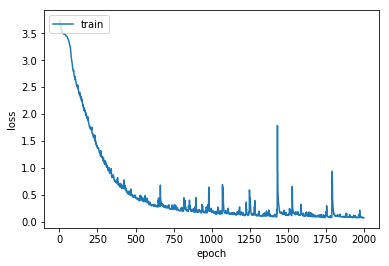

57/57 [==============================] - 0s 3ms/step
acc: 98.25%
one step prediction :  ['f10', 'i4', 'h8', 'g4', 'i8', 'f11', 'f12', 'b11', 'c12', 'd4', 'g8', 'f13', 'f14', 'z1', 'i11', 'd12', 'g4', 'b8', 'f4', 'e8', 'd10', 'e4', 'd8', 'c9', 'g9', 'f8', 'b13', 'b14', 'z1', 'c11', 'd12', 'e4', 'd8', 'c13', 'b12', 'a8', 'q31', 'b4', 'c8', 'd4', 'g8', 'f13', 'f14', 'z1', 'i11', 'h12', 'j4', 'i8', 'h8', 'g8', 'f8', 'd10', 'c9', 'g9', 'f8', 'c9', 'e9', 'd8', 'b13', 'b14', 'z1']
full song prediction :  ['f10', 'i4', 'h8', 'g4', 'i8', 'f11', 'f12', 'b11', 'c12', 'd4', 'g8', 'f13', 'f14', 'z1', 'i11', 'h12', 'j4', 'i8', 'h8', 'g8', 'f8', 'd10', 'c9', 'g9', 'f8', 'c9', 'e9', 'd8', 'b13', 'b14', 'z1', 'c11', 'd12', 'e4', 'd8', 'c13', 'b12', 'a8', 'q31', 'b4', 'c8', 'd4', 'g8', 'f13', 'f14', 'z1', 'i11', 'h12', 'j4', 'i8', 'h8', 'g8', 'f8', 'd10', 'c9', 'g9', 'f8', 'c9', 'e9', 'd8', 'b13']


In [8]:
# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 42

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (len(seq)-4, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))

# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=2, callbacks=[history])

# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 8. 모델 사용하기

pred_count = (len(seq)-4) # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['f10','i4', 'h8', 'g4']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['f10','i4', 'h8', 'g4']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)